In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_data_df = pd.read_csv('CustomerData.csv', delimiter=';')
customer_service_df = pd.read_csv('CustomerService.csv', delimiter=';')
transaction_df = pd.read_csv('Transaction.csv', delimiter=';')

In [3]:
customer_data_df.head()

# customer_data_df["LoginFrequency"].unique()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,LoginFrequency,ServiceUsage,Churn_status
0,1,62,M,Single,Low,34,Mobile App,0
1,2,65,M,Married,Low,5,Website,1
2,3,18,M,Single,Low,3,Website,0
3,4,21,M,Widowed,Low,2,Website,0
4,5,21,M,Divorced,Medium,41,Website,0


CustomerData DF EDA

Total Churn

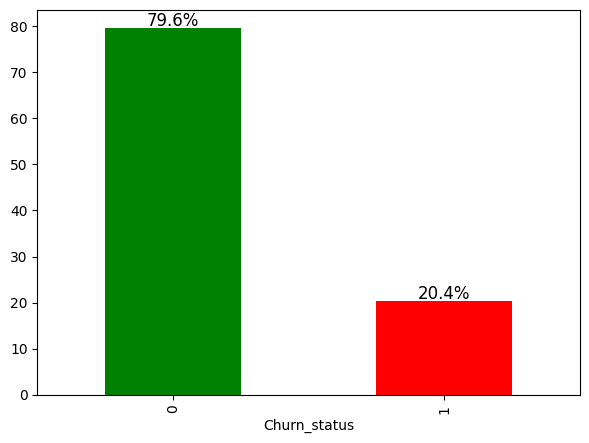

In [4]:
churn = customer_data_df[["CustomerID", "Churn_status"]]

churn_percentage = churn["Churn_status"].value_counts(normalize=True) * 100

plt.figure(figsize=(7, 5))
ax = churn_percentage.plot(kind="bar", color=["green", "red"])

for i,v in enumerate(churn_percentage):
    ax.text(i,v+0.5 ,f"{v:.1f}%",ha="center",fontsize=12)
plt.show()



Customer who churn's still lower than customer who retent

Comparison Churn with Age , Income and ServiceUsage

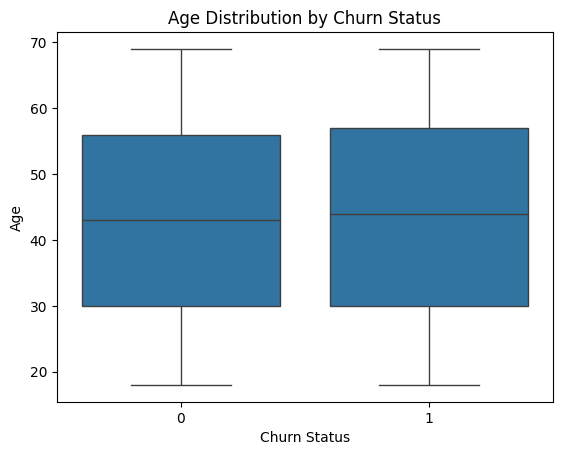

In [5]:
sns.boxplot(x="Churn_status", y="Age", data=customer_data_df)
plt.title("Age Distribution by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Age")
plt.show()

there is not significant difference with age as variable to affect churn

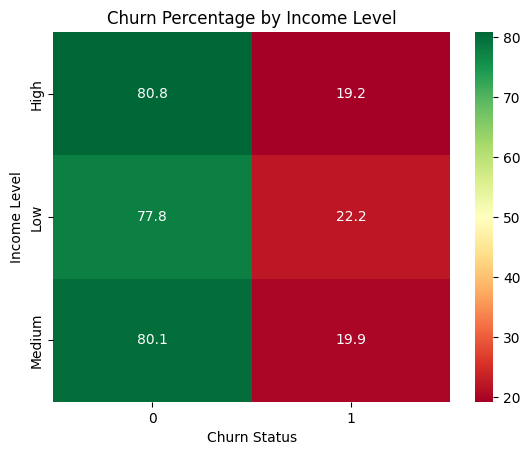

In [6]:
cross = pd.crosstab(customer_data_df["IncomeLevel"], customer_data_df["Churn_status"], normalize='index') * 100
sns.heatmap(cross, annot=True, fmt=".1f", cmap="RdYlGn")
plt.title("Churn Percentage by Income Level")
plt.ylabel("Income Level")
plt.xlabel("Churn Status")
plt.show()

there is not significant difference with IncomeLevel as variable to affect churn

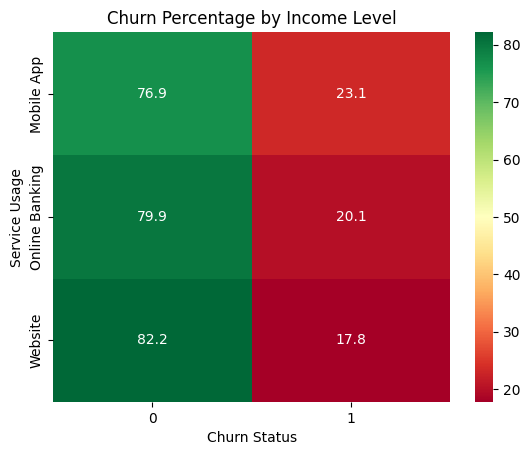

In [7]:
cross = pd.crosstab(customer_data_df["ServiceUsage"], customer_data_df["Churn_status"], normalize='index') * 100
sns.heatmap(cross, annot=True, fmt=".1f", cmap="RdYlGn")
plt.title("Churn Percentage by Income Level")
plt.ylabel("Service Usage")
plt.xlabel("Churn Status")
plt.show()

there is not significant difference with ServiceUsageq as variable to affect churn

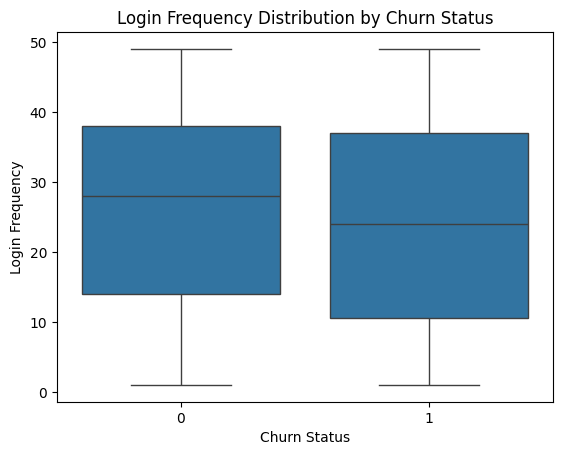

In [8]:
sns.boxplot(x="Churn_status", y="LoginFrequency", data=customer_data_df)
plt.title("Login Frequency Distribution by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Login Frequency")
plt.show()

Customer Service EDA

In [9]:
customer_service_df.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31 00:00:00,Inquiry,Resolved
1,2,3329,2022-03-17 00:00:00,Inquiry,Resolved
2,3,9976,2022-08-24 00:00:00,Inquiry,Resolved
3,4,7354,2022-11-18 00:00:00,Inquiry,Resolved
4,4,5393,2022-07-03 00:00:00,Inquiry,Unresolved


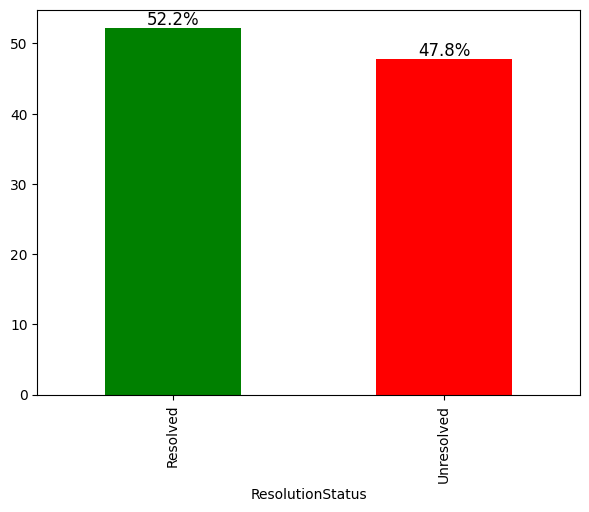

In [13]:
resolution = customer_service_df['ResolutionStatus']
resolution_percentage = resolution.value_counts(normalize=True) * 100

plt.figure(figsize=(7, 5))
ax = resolution_percentage.plot(kind="bar", color=["green", "red"])

for i,v in enumerate(resolution_percentage):
    ax.text(i,v+0.5 ,f"{v:.1f}%",ha="center",fontsize=12)
plt.show()

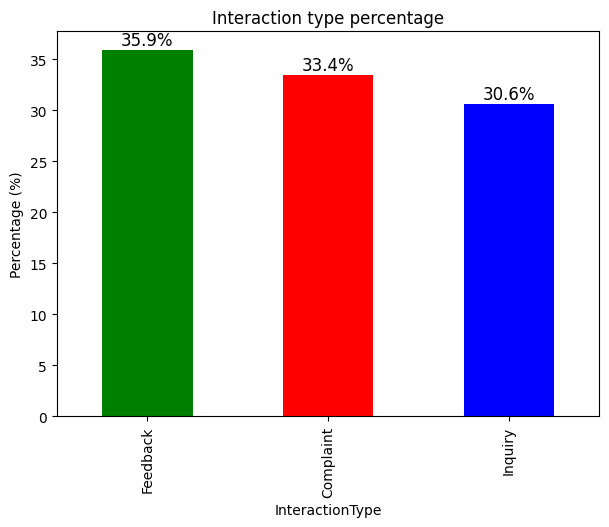

In [16]:
interaction = customer_service_df['InteractionType']
interaction_percentage = interaction.value_counts(normalize=True) * 100

plt.figure(figsize=(7, 5))
ax = interaction_percentage.plot(kind="bar", color=["green", "red", "blue"])

for i, v in enumerate(interaction_percentage):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=12)

plt.ylabel('Percentage (%)')
plt.title('Interaction type percentage')
plt.show()